In [2]:
df <- read.csv("2008.csv")
summary(df)

      Year          Month          DayofMonth      DayOfWeek    
 Min.   :2008   Min.   : 1.000   Min.   : 1.00   Min.   :1.000  
 1st Qu.:2008   1st Qu.: 3.000   1st Qu.: 8.00   1st Qu.:2.000  
 Median :2008   Median : 6.000   Median :16.00   Median :4.000  
 Mean   :2008   Mean   : 6.375   Mean   :15.73   Mean   :3.924  
 3rd Qu.:2008   3rd Qu.: 9.000   3rd Qu.:23.00   3rd Qu.:6.000  
 Max.   :2008   Max.   :12.000   Max.   :31.00   Max.   :7.000  
                                                                
    DepTime         CRSDepTime      ArrTime         CRSArrTime  
 Min.   :   1     Min.   :   0   Min.   :   1     Min.   :   0  
 1st Qu.: 928     1st Qu.: 925   1st Qu.:1107     1st Qu.:1115  
 Median :1325     Median :1320   Median :1512     Median :1517  
 Mean   :1334     Mean   :1326   Mean   :1481     Mean   :1495  
 3rd Qu.:1728     3rd Qu.:1715   3rd Qu.:1909     3rd Qu.:1907  
 Max.   :2400     Max.   :2359   Max.   :2400     Max.   :2400  
 NA's   :136246          

In [3]:
# eliminate rows with NA values (original count over 7 million)
df <- na.omit(df)
# for partitioning to work data has to be ordered
times <- df[order(df$ArrTime),]
nrow(times)

[1] 1524735

In [4]:
# partition data - 75% training
library(caret)
set.seed(1337)
trainingIndices <- createDataPartition(df$ArrTime,p=0.75,list=FALSE)
trainingSet <- df[trainingIndices,]
testingSet <- df[-trainingIndices,]
nrow(trainingSet)
nrow(testingSet)

Warning message:
"package 'caret' was built under R version 3.4.2"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.4.2"
Attaching package: 'lattice'

The following object is masked from 'package:boot':

    melanoma

Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.4.2"
Attaching package: 'caret'

The following object is masked from 'package:survival':

    cluster



[1] 1143553

[1] 381182

In [5]:
model <- lm(ArrTime ~ CRSArrTime + ArrDelay + DepDelay + Diverted + 
            CarrierDelay + WeatherDelay + NASDelay + SecurityDelay + LateAircraftDelay, 
            data=trainingSet)
summary(model)


Call:
lm(formula = ArrTime ~ CRSArrTime + ArrDelay + DepDelay + Diverted + 
    CarrierDelay + WeatherDelay + NASDelay + SecurityDelay + 
    LateAircraftDelay, data = trainingSet)

Residuals:
    Min      1Q  Median      3Q     Max 
-2139.0   -62.2    91.9   215.6  3739.7 

Coefficients: (2 not defined because of singularities)
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        5.318e+02  1.654e+00 321.584  < 2e-16 ***
CRSArrTime         6.814e-01  9.567e-04 712.243  < 2e-16 ***
ArrDelay          -1.806e+00  2.877e-02 -62.763  < 2e-16 ***
DepDelay           3.065e-01  2.492e-02  12.299  < 2e-16 ***
Diverted                  NA         NA      NA       NA    
CarrierDelay       8.872e-01  1.505e-02  58.962  < 2e-16 ***
WeatherDelay       6.033e-01  2.528e-02  23.867  < 2e-16 ***
NASDelay           1.690e+00  1.945e-02  86.930  < 2e-16 ***
SecurityDelay      7.563e-01  2.369e-01   3.192  0.00141 ** 
LateAircraftDelay         NA         NA      NA       NA  

Warning message in predict.lm(model, newdata = testingSet):
"prediction from a rank-deficient fit may be misleading"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   -941    1360    1629    1590    1843    2217 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1    1249    1711    1590    2034    2400 

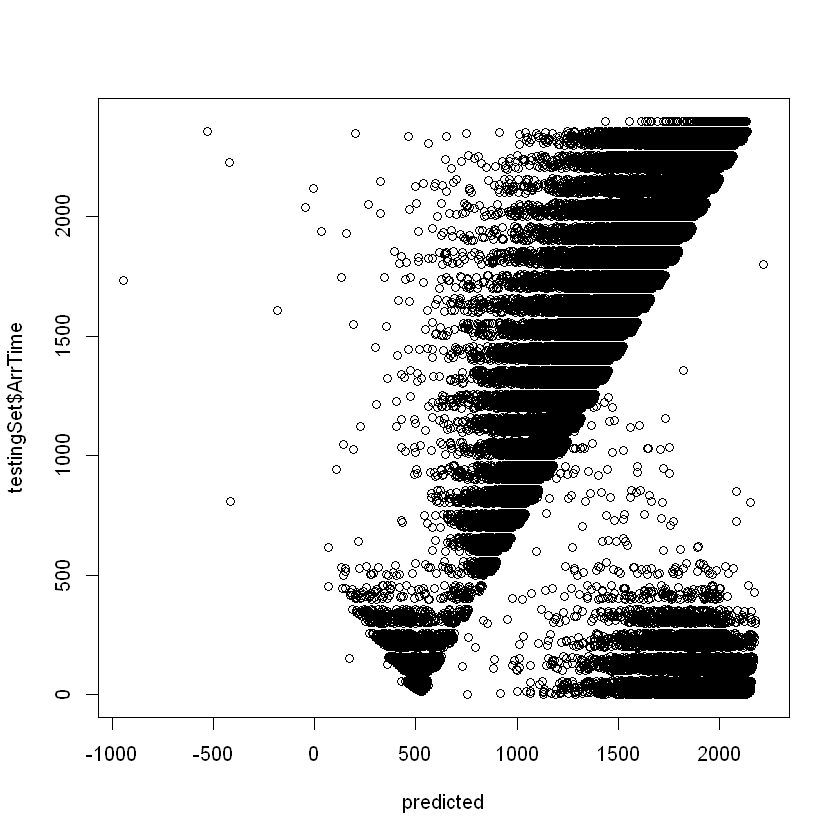

In [6]:
predicted <- predict(model, newdata=testingSet)
summary(predicted)
summary(testingSet$ArrTime)
plot(predicted,testingSet$ArrTime)

[1] 1093.8577111    0.3119501

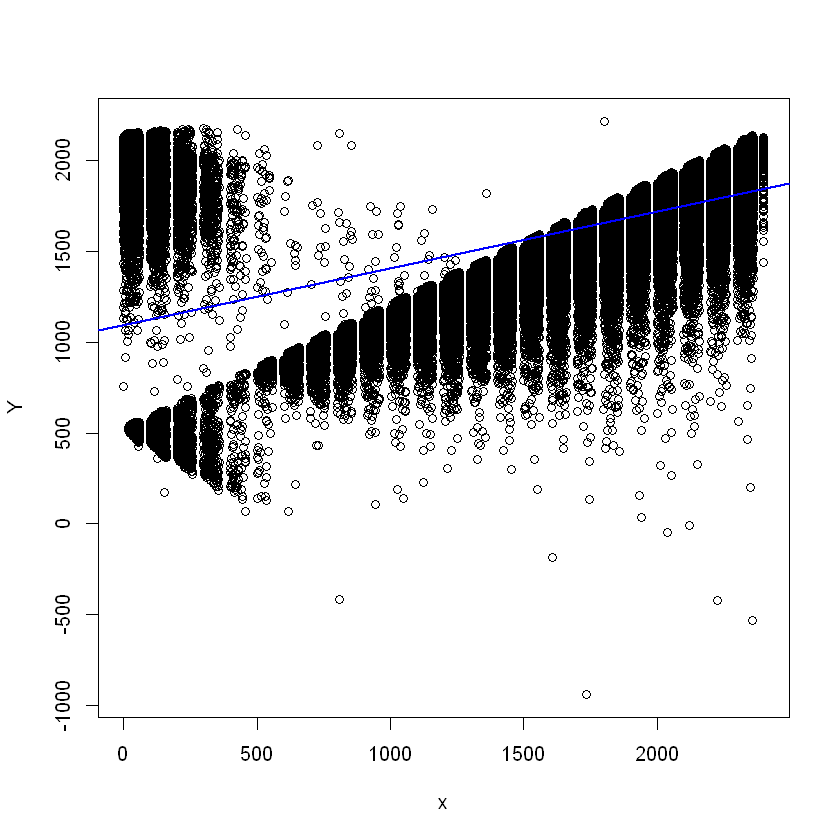

In [7]:
x <- testingSet$ArrTime
Y <- predicted
b1 <- sum((x-mean(x)) * (Y - mean(Y))) / sum((x-mean(x))^2)
b0 <- mean(Y) - b1*mean(x)
c(b0,b1)
plot(x,Y)
abline(c(b0,b1),col="blue",lwd=2)

In [ ]:
#install.packages("relaimpo", repos='http://cran.us.r-project.org')
library(relaimpo)
calc.relimp(model, type=c("lmg","last","first","pratt"))